In [2]:
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [7]:
df = pd.read_csv("/Users/lisajin/Documents/Smnology/self_obtained_data/Fitbit Experiment.csv")
headers = np.array(df.columns)  # get headers
values = df.values  # numpy array of values
matrix = np.concatenate([[headers], values])  # append to the final matrix


data=pd.DataFrame(df).to_numpy()

In [8]:
df.head()

,Day,Calories Burned,Steps,Distance,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,15-Apr,"2,128","9,693",4.14,634,261,3,20,984,403,66,23,469,55,303,45
1,16-Apr,"2,229","9,870",4.39,691,244,7,29,"1,044",428,54,33,482,89,256,83
2,17-Apr,"2,177","11,596",5.34,686,228,11,33,"1,023",410,46,25,456,85,223,102
3,18-Apr,"2,128","10,279",4.83,725,206,9,44,980,391,55,24,446,58,234,99
4,19-Apr,"2,006","7,942",3.32,755,197,26,16,833,408,67,26,475,71,263,74


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day                     28 non-null     object 
 1   Calories Burned         28 non-null     object 
 2   Steps                   28 non-null     object 
 3   Distance                28 non-null     float64
 4   Minutes Sedentary       28 non-null     int64  
 5   Minutes Lightly Active  28 non-null     int64  
 6   Minutes Fairly Active   28 non-null     int64  
 7   Minutes Very Active     28 non-null     int64  
 8   Activity Calories       28 non-null     object 
 9   Minutes Asleep          28 non-null     int64  
 10  Minutes Awake           28 non-null     int64  
 11  Number of Awakenings    28 non-null     int64  
 12  Time in Bed             28 non-null     int64  
 13  Minutes REM Sleep       28 non-null     int64  
 14  Minutes Light Sleep     28 non-null     int6

In [10]:
#df["Steps"] = pd.to_numeric(df.Steps, errors='coerce')

<AxesSubplot:>

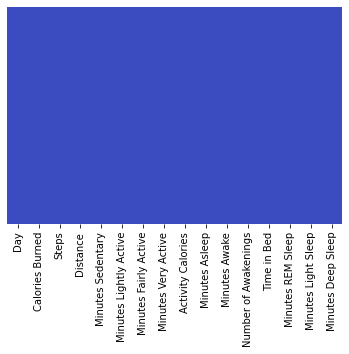

In [11]:
#check the null part in the whole data set, red part is missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Text(0.5, 1.0, 'Correlation')

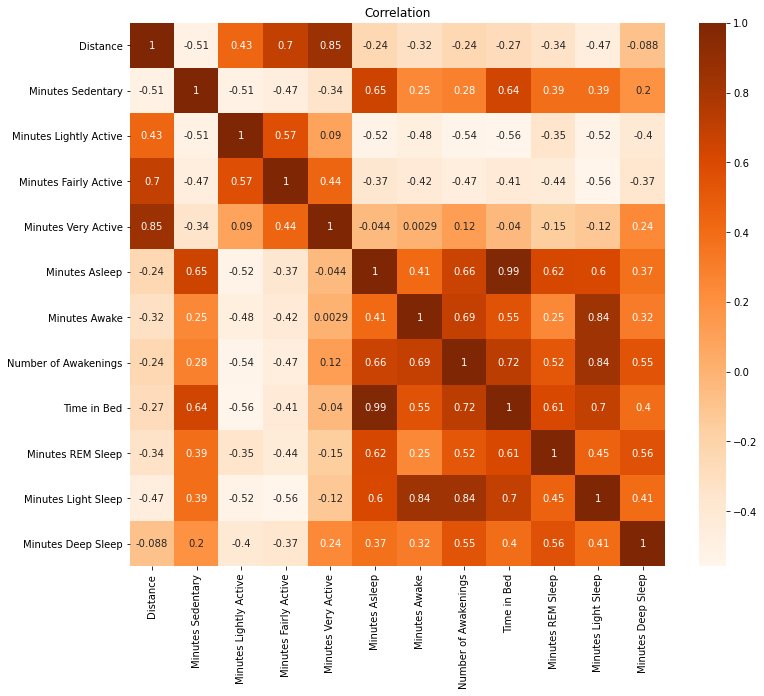

In [12]:
import matplotlib.pyplot as plt
# visualisation of this correlation
fig = plt.figure(figsize = (12,10))
r = sns.heatmap(df.corr(),cmap='Oranges',annot=True)
# set title
r.set_title('Correlation')

In [13]:
print ('The average time in bed of these users is :', df['Time in Bed'].mean(), 'Minutes')
print ('The average time in bed of these users is :', df['Time in Bed'].mean()/60, 'hour')


The average time in bed of these users is : 424.92857142857144 Minutes
The average time in bed of these users is : 7.082142857142857 hour


/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributi

/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributi

/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributi

/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributi

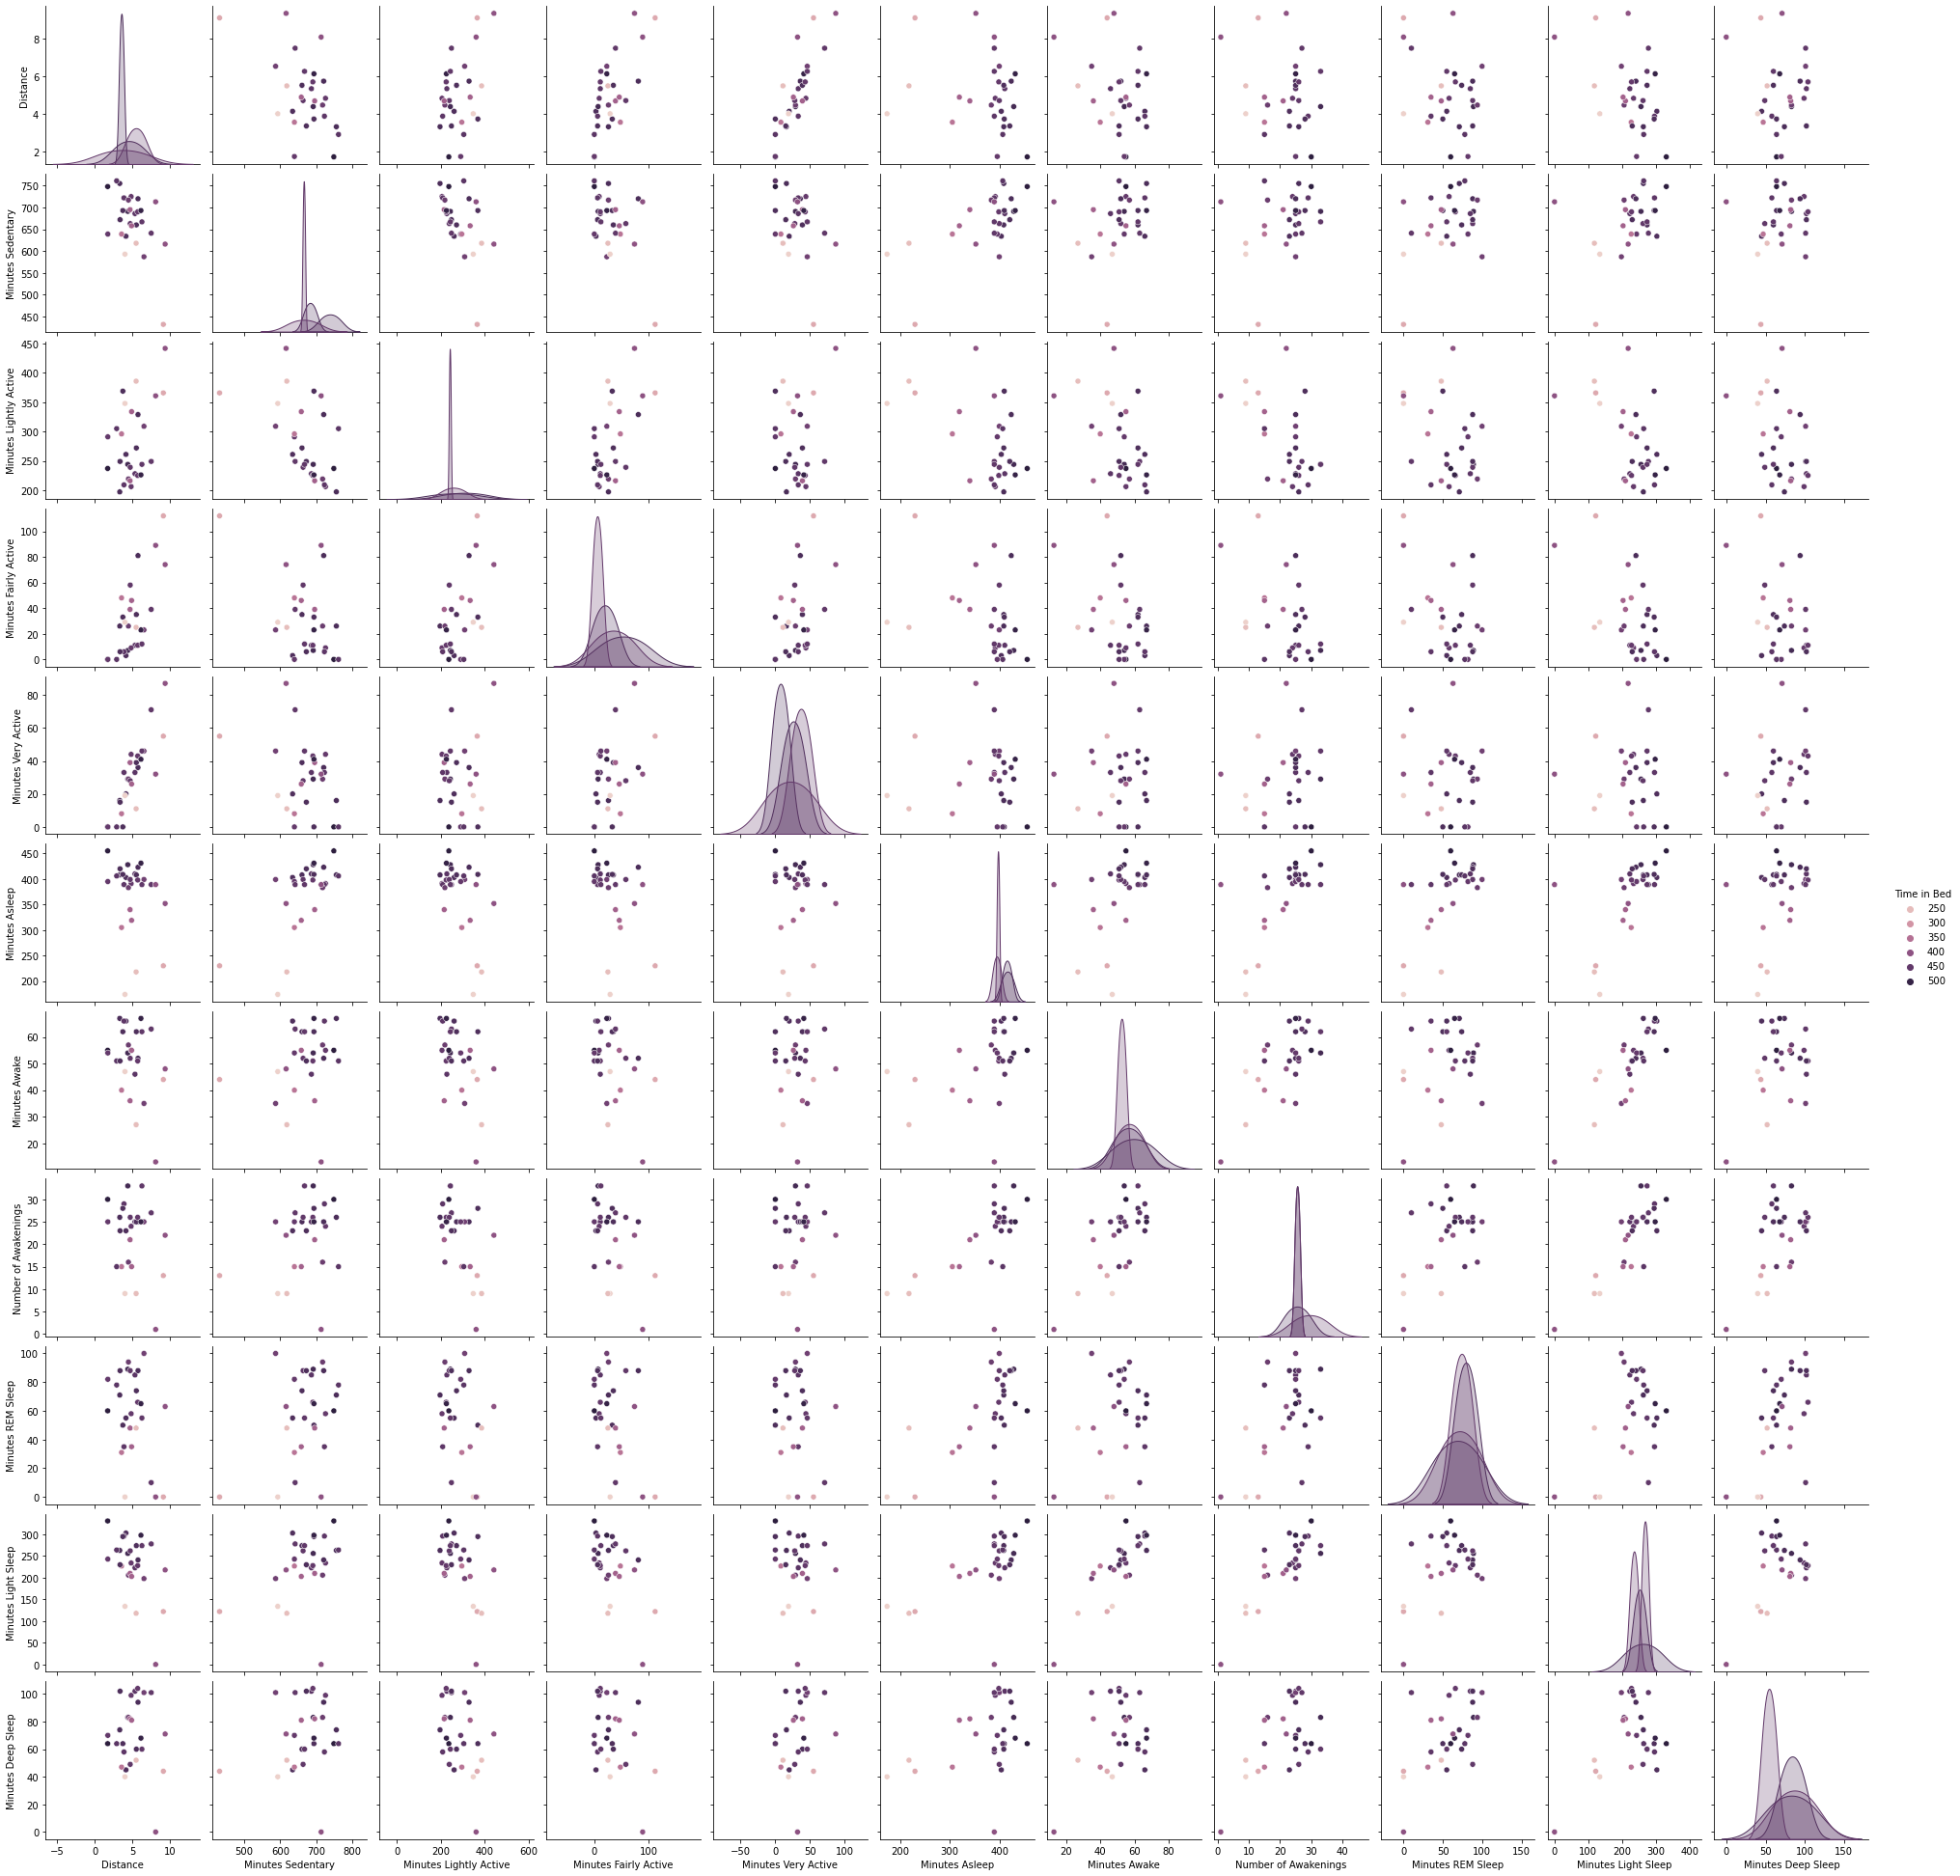

In [14]:
# Pairplot
sns.pairplot(df, hue='Time in Bed')

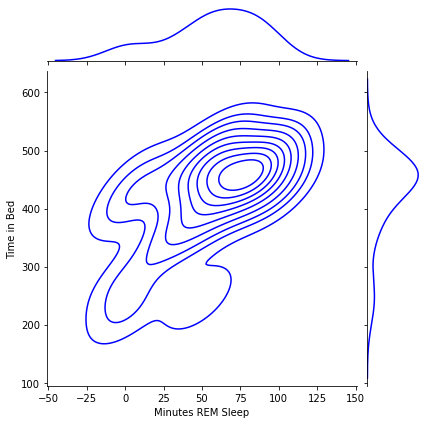

In [15]:
# Joint plot of features "Minutes REM Sleep" and "Time in bed" with unit second.
sns.jointplot(x='Minutes REM Sleep',y='Time in Bed',data=df,color='blue',kind = 'kde')

In [ ]:
df.head()

In [ ]:
# Joint plot of features "Minutes REM Sleep" and "Time in bed" with unit second.
sns.jointplot(x='Minutes REM Sleep',y='Time in Bed',data=df,color='blue',kind = 'reg')

In [ ]:
# Joint plot of features "Minutes REM Sleep" and "Time in bed" with unit second.
sns.jointplot(x='Minutes Deep Sleep',y='Time in Bed',data=df,color='blue',kind = 'kde')

In [ ]:
# Joint plot of features "Minutes REM Sleep" and "Time in bed" with unit second.
sns.jointplot(x='Minutes Deep Sleep',y='Minutes REM Sleep',data=df,color='blue',kind = 'kde')

In [ ]:
g=sns.FacetGrid(df,col='Minutes REM Sleep')
g.map(sns.histplot,'Minutes Deep Sleep')

# Machine Learning for sleep score

In [ ]:
# Perform first split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(sleep_data.iloc[:,:-1], 
                                                              sleep_data['overall_score'], 
                                                              test_size=0.2, 
                                                              random_state=42)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, 
                                                      test_size=0.25, random_state=42)